# RSI Divergence pattern analysis

During investigation of the tradings results of th RSI Divergeance strategy, two patterns appeard that yield to different results
<div>
    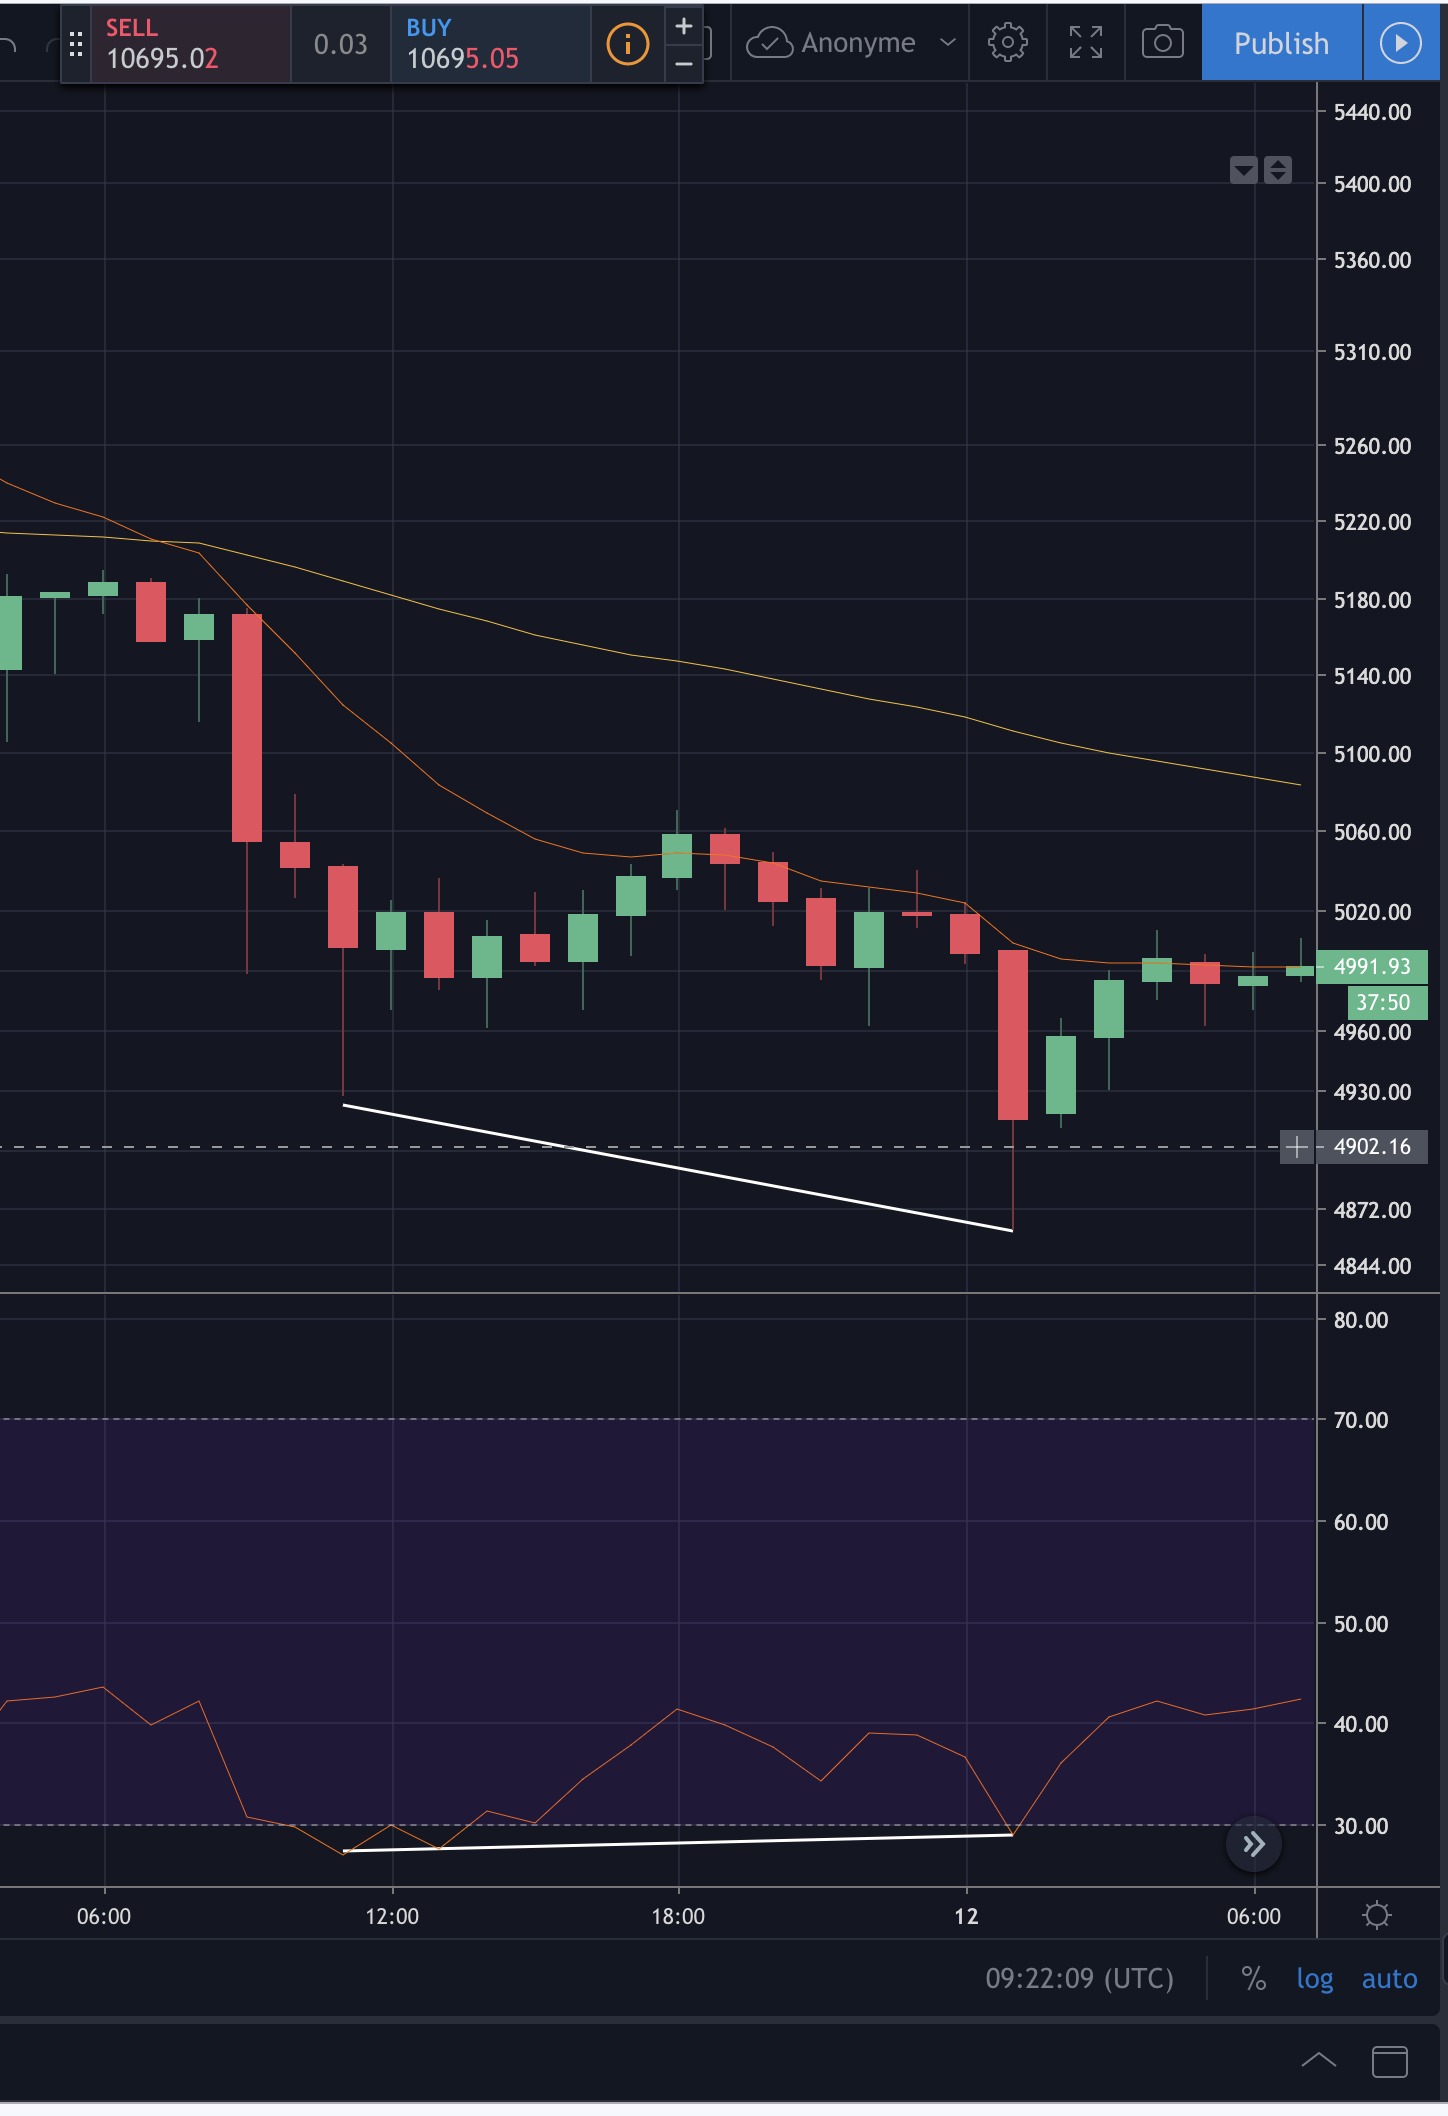
    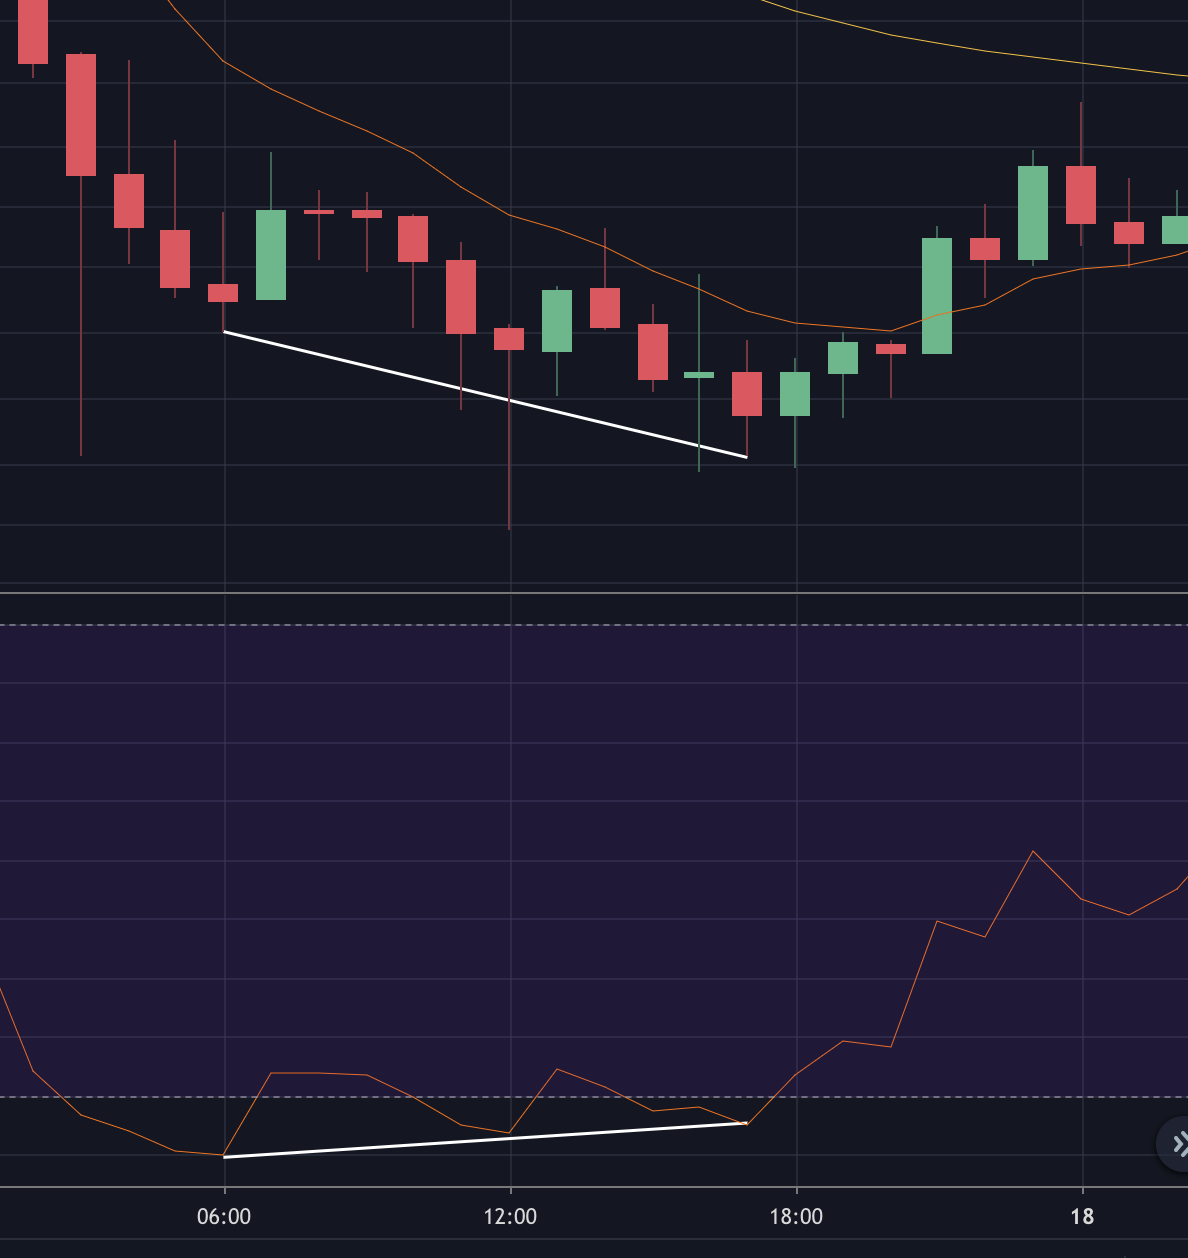
</div>

1. Pattern #1: No local minima between 2 peaks detected
2. Pattern #2: Local minima between 2 peaks detected

By investigating the data set, I noticed that the 1st pattern perfom well than the 2d one:
- In a long-term bullish trend
    1. Pattern #1 makes >= 4% of returns and in the worst case < - 0.001%
    2. Pattern #2 makes at most 1% and >= -4% in the worst case
    
 The goal of this study is to prove this intuiton.
 
 I'm going to see if there is a correlaction between theses patterns and the % of returns



## Hypothesis
- Pattern 1: small loss, big returns, win/loss > 1
- Pattern 2: big loss, small returns, win/loss < 1

SL: 0.01, TP: 0.02
Timeframe: 1h

# Importing libraries

In [198]:
import pandas as pd

In [199]:
trades = pd.read_csv('../backtest_results/trades_local_non_local.csv', header=0, parse_dates=True, index_col=0)

In [200]:
trades.head()

,symbol,direction,open_market_price,close_market_price,is_open,open_price,open_date,close_price,close_date,indicator,duration,returns_long,returns_short,win_trades_long,loss_trades_long,win_trades_short,loss_trades_short
0,BTC-USDT,LONG,4604.97,4483.94,False,50.000000,2017-09-02 12:00:00.000,48.685876,2017-09-02 14:00:00.000,NaN,0 days 02:00:00.000000000,-0.026282,NaN,False,True,False,False
1,BTC-USDT,LONG,4460.19,4351.19,False,49.214647,2017-09-02 15:00:00.000,48.011918,2017-09-02 20:00:00.000,NaN,0 days 05:00:00.000000000,-0.024438,NaN,False,True,False,False
2,BTC-USDT,LONG,4299.53,4605.12,False,48.486888,2017-09-02 21:00:00.000,51.933104,2017-09-03 06:00:00.000,NaN,0 days 09:00:00.000000000,0.071075,NaN,True,False,False,False
3,BTC-USDT,LONG,4523.47,4303.10,False,50.079450,2017-09-03 09:00:00.000,47.639728,2017-09-03 13:00:00.000,4418.22,0 days 04:00:00.000000000,-0.048717,NaN,False,True,False,False
4,BTC-USDT,LONG,4399.93,4438.11,False,48.732554,2017-09-03 14:00:00.000,49.155426,2017-09-04 00:00:00.000,4286.87,0 days 10:00:00.000000000,0.008677,NaN,True,False,False,False


# Preparing the data

In [201]:
trades_custom = trades[['open_date', 'close_date', 'open_market_price', 'close_market_price', 'indicator', 'returns_long', 'win_trades_long', 'loss_trades_long']]

In [202]:
trades_custom.head()

,open_date,close_date,open_market_price,close_market_price,indicator,returns_long,win_trades_long,loss_trades_long
0,2017-09-02 12:00:00.000,2017-09-02 14:00:00.000,4604.97,4483.94,NaN,-0.026282,False,True
1,2017-09-02 15:00:00.000,2017-09-02 20:00:00.000,4460.19,4351.19,NaN,-0.024438,False,True
2,2017-09-02 21:00:00.000,2017-09-03 06:00:00.000,4299.53,4605.12,NaN,0.071075,True,False
3,2017-09-03 09:00:00.000,2017-09-03 13:00:00.000,4523.47,4303.10,4418.22,-0.048717,False,True
4,2017-09-03 14:00:00.000,2017-09-04 00:00:00.000,4399.93,4438.11,4286.87,0.008677,True,False


In [203]:
len(trades_custom)

318

## Analysing winning vs losing trades

In [204]:
win_trades = trades_custom['win_trades_long']
loss_trades = trades_custom['loss_trades_long']

win_trades_sum = win_trades.sum()
loss_trades_sum = loss_trades.sum()
total_trades = win_trades_sum + loss_trades_sum

In [205]:
print('Win %: ', win_trades_sum/total_trades*100)
print('Loss %: ', loss_trades_sum/total_trades*100)
print('Win/Loss ratio: ', win_trades_sum/loss_trades_sum)
print('Total:', total_trades)

Win %:  39.11671924290221
Loss %:  60.88328075709779
Win/Loss ratio:  0.6424870466321243
Total: 317


### By local minima

In [206]:
win_trades_local_min = trades_custom.loc[trades_custom['indicator'] > 0, 'win_trades_long'].sum()
loss_trades_local_min = trades_custom.loc[trades_custom['indicator'] > 0, 'loss_trades_long'].sum()
total_trades_local_min = win_trades_local_min + loss_trades_local_min

In [207]:
print('Win %: ', win_trades_local_min/total_trades_local_min*100)
print('Loss %: ', loss_trades_local_min/total_trades_local_min*100)
print('Win/Loss ratio: ', win_trades_local_min/loss_trades_local_min)
print('Total:', total_trades_local_min)

Win %:  33.72781065088758
Loss %:  66.27218934911244
Win/Loss ratio:  0.5089285714285714
Total: 169


### By No local minima

In [208]:
win_trades_no_local_min = trades_custom.loc[trades_custom['indicator'].isnull(), 'win_trades_long'].sum()
loss_trades_no_local_min = trades_custom.loc[trades_custom['indicator'].isnull(), 'loss_trades_long'].sum()
total_trades_no_local_min = win_trades_no_local_min + loss_trades_no_local_min

In [209]:
print('Win %: ', win_trades_no_local_min/total_trades_no_local_min*100)
print('Loss %: ', loss_trades_no_local_min/total_trades_no_local_min*100)
print('Win/Loss ratio: ', win_trades_no_local_min/loss_trades_no_local_min)
print('Total:', total_trades_no_local_min)

Win %:  45.27027027027027
Loss %:  54.729729729729726
Win/Loss ratio:  0.8271604938271605
Total: 148


## Analysing returns: local minima vs non local minima

### Total returns

In [210]:
returns = trades_custom['returns_long']

In [211]:
returns.describe()

count    317.000000
mean      -0.001320
std        0.032421
min       -0.094998
25%       -0.019051
50%       -0.011396
75%        0.014714
max        0.134093
Name: returns_long, dtype: float64

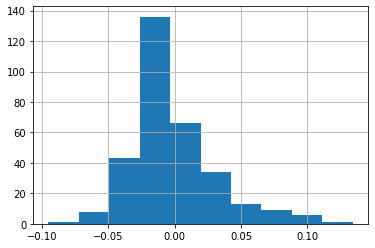

In [212]:
returns.hist(bins=10)

### Local minima returns

In [213]:
returns_local_min = trades_custom.loc[trades_custom['indicator'] > 0, 'returns_long']

count    115.000000
mean      -0.004508
std        0.032579
min       -0.071156
25%       -0.020647
50%       -0.012864
75%        0.012627
max        0.105897
Name: returns_long, dtype: float64 

- Total returns:  -0.518422344419944 

- Frequency:  (-0.0723, -0.0535]      3
(-0.0535, -0.0357]     11
(-0.0357, -0.018]      23
(-0.018, -0.000335]    41
(-0.000335, 0.0174]    15
(0.0174, 0.0351]        8
(0.0351, 0.0528]        8
(0.0528, 0.0705]        2
(0.0705, 0.0882]        2
(0.0882, 0.106]         2
Name: returns_long, dtype: int64


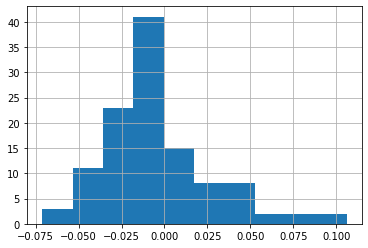

In [256]:
returns_local_min.hist(bins=10)
print(returns_local_min.describe(), '\n')
print('- Total returns: ', returns_local_min.sum(), '\n')
print('- Frequency: ', returns_local_min.value_counts(bins=10, sort=False))

In [215]:
returns_non_local_min = trades_custom.loc[trades_custom['indicator'].isnull(), 'returns_long']

count    148.000000
mean       0.001994
std        0.032926
min       -0.094998
25%       -0.016731
50%       -0.010408
75%        0.015676
max        0.103906
Name: returns_long, dtype: float64 

Total returns:  0.2951304225422664 

- Frequency:  (-0.09620000000000001, -0.0751]     1
(-0.0751, -0.0552]                  0
(-0.0552, -0.0353]                 12
(-0.0353, -0.0154]                 31
(-0.0154, 0.00445]                 42
(0.00445, 0.0243]                  32
(0.0243, 0.0442]                   15
(0.0442, 0.0641]                    5
(0.0641, 0.084]                     6
(0.084, 0.104]                      4
Name: returns_long, dtype: int64


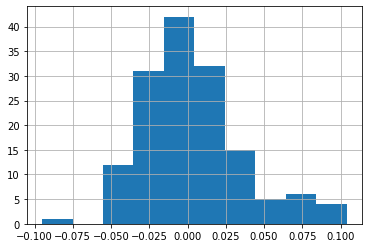

In [216]:
returns_non_local_min.hist()
print(returns_non_local_min.describe(), '\n')
print('Total returns: ', returns_non_local_min.sum(), '\n')
print('- Frequency: ', returns_non_local_min.value_counts(bins=10, sort=False))

## Bullish market 2017 analysis

In [217]:
start_date = '2017-09-02 00:00:00'
end_date = '2017-11-12 00:00:00'
mask = (trades_custom['open_date'] >= start_date) & (trades_custom['open_date'] <= end_date)
trades_bull_2017 = trades_custom.loc[mask]

### Winning vs losing trades

In [218]:
win_trades = trades_bull_2017['win_trades_long']
loss_trades = trades_bull_2017['loss_trades_long']
win_trades_sum = win_trades.sum()
loss_trades_sum = loss_trades.sum()
total_trades = win_trades_sum + loss_trades_sum

In [219]:
print('Win %: ', win_trades_sum/total_trades*100)
print('Loss %: ', loss_trades_sum/total_trades*100)
print('Win/Loss ratio: ', win_trades_sum/loss_trades_sum)
print('Total:', total_trades)

Win %:  34.090909090909086
Loss %:  65.9090909090909
Win/Loss ratio:  0.5172413793103449
Total: 44


### By local minima

In [220]:
win_trades_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'] > 0, 'win_trades_long'].sum()
loss_trades_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'] > 0, 'loss_trades_long'].sum()
total_trades_local_min = win_trades_local_min + loss_trades_local_min

In [221]:
print('Win %: ', win_trades_local_min/total_trades_local_min*100)
print('Loss %: ', loss_trades_local_min/total_trades_local_min*100)
print('Win/Loss ratio: ', win_trades_local_min/loss_trades_local_min)
print('Total:', total_trades_local_min)

Win %:  21.052631578947366
Loss %:  78.94736842105263
Win/Loss ratio:  0.26666666666666666
Total: 19


### By non local minima

In [222]:
win_trades_no_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'].isnull(), 'win_trades_long'].sum()
loss_trades_no_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'].isnull(), 'loss_trades_long'].sum()
total_trades_no_local_min = win_trades_no_local_min + loss_trades_no_local_min

In [223]:
print('Win %: ', win_trades_no_local_min/total_trades_no_local_min*100)
print('Loss %: ', loss_trades_no_local_min/total_trades_no_local_min*100)
print('Win/Loss ratio: ', win_trades_no_local_min/loss_trades_no_local_min)
print('Total:', total_trades_no_local_min)

Win %:  44.0
Loss %:  56.00000000000001
Win/Loss ratio:  0.7857142857142857
Total: 25


## Analysing returns

In [224]:
returns_bull_2017 = trades_bull_2017['returns_long']

count    44.000000
mean     -0.010062
std       0.028042
min      -0.094998
25%      -0.023186
50%      -0.014032
75%       0.006294
max       0.071075
Name: returns_long, dtype: float64 

Total returns:  -0.4427216607730924 

- Frequency:  (-0.09620000000000001, -0.0784]     1
(-0.0784, -0.0618]                  0
(-0.0618, -0.0452]                  2
(-0.0452, -0.0286]                  5
(-0.0286, -0.012]                  16
(-0.012, 0.00465]                   8
(0.00465, 0.0213]                   7
(0.0213, 0.0379]                    3
(0.0379, 0.0545]                    1
(0.0545, 0.0711]                    1
Name: returns_long, dtype: int64


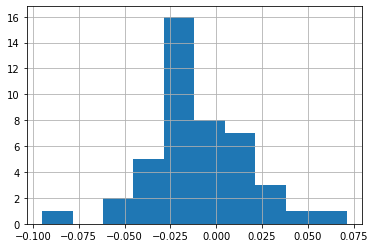

In [225]:
print(returns_bull_2017.describe(), '\n')
print('Total returns: ', returns_bull_2017.sum(), '\n')
print('- Frequency: ', returns_bull_2017.value_counts(bins=10, sort=False))
returns_bull_2017.hist()

### By local minima

In [226]:
returns_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'] > 0, 'returns_long']

count    19.000000
mean     -0.014402
std       0.023171
min      -0.048717
25%      -0.027656
50%      -0.018226
75%      -0.011239
max       0.047215
Name: returns_long, dtype: float64 

- Total returns:  -0.273638180740723 

- Frequency:  (-0.049800000000000004, -0.0391]    2
(-0.0391, -0.0295]                  3
(-0.0295, -0.0199]                  3
(-0.0199, -0.0103]                  7
(-0.0103, -0.000751]                0
(-0.000751, 0.00884]                2
(0.00884, 0.0184]                   0
(0.0184, 0.028]                     1
(0.028, 0.0376]                     0
(0.0376, 0.0472]                    1
Name: returns_long, dtype: int64


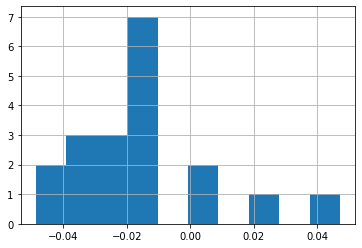

In [227]:
returns_local_min.hist()
print(returns_local_min.describe(), '\n')
print('- Total returns: ', returns_local_min.sum(), '\n')
print('- Frequency: ', returns_local_min.value_counts(bins=10, sort=False))

### By non local minima

In [228]:
returns_non_local_min = trades_bull_2017.loc[trades_bull_2017['indicator'].isnull(), 'returns_long']

count    25.000000
mean     -0.006763
std       0.031305
min      -0.094998
25%      -0.018755
50%      -0.011457
75%       0.012480
max       0.071075
Name: returns_long, dtype: float64 

Total returns:  -0.1690834800323694 

- Frequency:  (-0.09620000000000001, -0.0784]    1
(-0.0784, -0.0618]                 0
(-0.0618, -0.0452]                 1
(-0.0452, -0.0286]                 1
(-0.0286, -0.012]                  9
(-0.012, 0.00465]                  5
(0.00465, 0.0213]                  5
(0.0213, 0.0379]                   2
(0.0379, 0.0545]                   0
(0.0545, 0.0711]                   1
Name: returns_long, dtype: int64


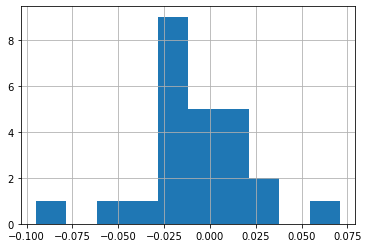

In [229]:
returns_non_local_min.hist()
print(returns_non_local_min.describe(), '\n')
print('Total returns: ', returns_non_local_min.sum(), '\n')
print('- Frequency: ', returns_non_local_min.value_counts(bins=10, sort=False))

## Bull market 2019 analysis

In [230]:
start_date = '2019-02-04 00:00:00'
end_date = '2019-07-02 00:00:00'
mask = (trades_custom['open_date'] >= start_date) & (trades_custom['open_date'] <= end_date)
trades_bull_2019 = trades_custom.loc[mask]

### Winning vs losing trades

In [231]:
win_trades = trades_bull_2019['win_trades_long']
loss_trades = trades_bull_2019['loss_trades_long']
win_trades_sum = win_trades.sum()
loss_trades_sum = loss_trades.sum()
total_trades = win_trades_sum + loss_trades_sum

In [232]:
print('Win %: ', win_trades_sum/total_trades*100)
print('Loss %: ', loss_trades_sum/total_trades*100)
print('Win/Loss ratio: ', win_trades_sum/loss_trades_sum)
print('Total:', total_trades)

Win %:  34.48275862068966
Loss %:  65.51724137931035
Win/Loss ratio:  0.5263157894736842
Total: 29


### By local minima

In [233]:
win_trades_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'] > 0, 'win_trades_long'].sum()
loss_trades_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'] > 0, 'loss_trades_long'].sum()
total_trades_local_min = win_trades_local_min + loss_trades_local_min

In [234]:
print('Win %: ', win_trades_local_min/total_trades_local_min*100)
print('Loss %: ', loss_trades_local_min/total_trades_local_min*100)
print('Win/Loss ratio: ', win_trades_local_min/loss_trades_local_min)
print('Total:', total_trades_local_min)

Win %:  23.52941176470588
Loss %:  76.47058823529412
Win/Loss ratio:  0.3076923076923077
Total: 17


### By non local minima

In [235]:
win_trades_no_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'].isnull(), 'win_trades_long'].sum()
loss_trades_no_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'].isnull(), 'loss_trades_long'].sum()
total_trades_no_local_min = win_trades_no_local_min + loss_trades_no_local_min

In [236]:
print('Win %: ', win_trades_no_local_min/total_trades_no_local_min*100)
print('Loss %: ', loss_trades_no_local_min/total_trades_no_local_min*100)
print('Win/Loss ratio: ', win_trades_no_local_min/loss_trades_no_local_min)
print('Total:', total_trades_no_local_min)

Win %:  50.0
Loss %:  50.0
Win/Loss ratio:  1.0
Total: 12


## Analysing returns

In [237]:
returns_bull_2019 = trades_bull_2019['returns_long']

count    29.000000
mean     -0.005604
std       0.021678
min      -0.040576
25%      -0.019051
50%      -0.011237
75%       0.007482
max       0.045696
Name: returns_long, dtype: float64 

Total returns:  -0.16251481914668386 

- Frequency:  (-0.0417, -0.0319]     2
(-0.0319, -0.0233]     3
(-0.0233, -0.0147]     6
(-0.0147, -0.00607]    8
(-0.00607, 0.00256]    0
(0.00256, 0.0112]      5
(0.0112, 0.0198]       1
(0.0198, 0.0284]       1
(0.0284, 0.0371]       0
(0.0371, 0.0457]       3
Name: returns_long, dtype: int64


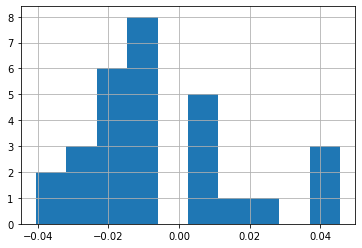

In [238]:
print(returns_bull_2019.describe(), '\n')
print('Total returns: ', returns_bull_2019.sum(), '\n')
print('- Frequency: ', returns_bull_2019.value_counts(bins=10, sort=False))
returns_bull_2019.hist()

### By local minima

In [239]:
returns_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'] > 0, 'returns_long']

count    17.000000
mean     -0.011088
std       0.019759
min      -0.040576
25%      -0.024700
50%      -0.012806
75%      -0.010183
max       0.038259
Name: returns_long, dtype: float64 

- Total returns:  -0.1885023995760463 

- Frequency:  (-0.0417, -0.0327]      2
(-0.0327, -0.0248]      2
(-0.0248, -0.0169]      2
(-0.0169, -0.00904]     7
(-0.00904, -0.00116]    0
(-0.00116, 0.00672]     1
(0.00672, 0.0146]       1
(0.0146, 0.0225]        1
(0.0225, 0.0304]        0
(0.0304, 0.0383]        1
Name: returns_long, dtype: int64


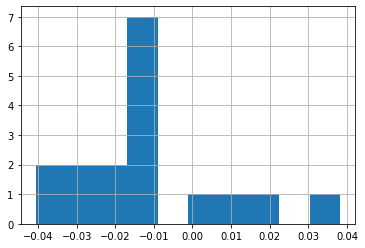

In [240]:
returns_local_min.hist()
print(returns_local_min.describe(), '\n')
print('- Total returns: ', returns_local_min.sum(), '\n')
print('- Frequency: ', returns_local_min.value_counts(bins=10, sort=False))

### By non local minima

In [241]:
returns_non_local_min = trades_bull_2019.loc[trades_bull_2019['indicator'].isnull(), 'returns_long']

count    12.000000
mean      0.002166
std       0.022715
min      -0.022811
25%      -0.014738
50%      -0.003523
75%       0.011189
max       0.045696
Name: returns_long, dtype: float64 

Total returns:  0.025987580429362438 

- Frequency:  (-0.0239, -0.016]       3
(-0.016, -0.00911]      3
(-0.00911, -0.00226]    0
(-0.00226, 0.00459]     1
(0.00459, 0.0114]       2
(0.0114, 0.0183]        1
(0.0183, 0.0251]        0
(0.0251, 0.032]         0
(0.032, 0.0388]         0
(0.0388, 0.0457]        2
Name: returns_long, dtype: int64


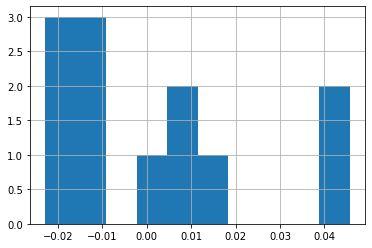

In [242]:
returns_non_local_min.hist()
print(returns_non_local_min.describe(), '\n')
print('Total returns: ', returns_non_local_min.sum(), '\n')
print('- Frequency: ', returns_non_local_min.value_counts(bins=10, sort=False))

## Bear Market 2018 analysis

In [243]:
start_date = '2017-12-18 00:00:00'
end_date = '2018-12-10 00:00:00'
mask = (trades_custom['open_date'] >= start_date) & (trades_custom['open_date'] <= end_date)
trades_bear_2018 = trades_custom.loc[mask]

### Winning vs losing trades

In [244]:
win_trades = trades_bear_2018['win_trades_long']
loss_trades = trades_bear_2018['loss_trades_long']
win_trades_sum = win_trades.sum()
loss_trades_sum = loss_trades.sum()
total_trades = win_trades_sum + loss_trades_sum

In [245]:
print('Win %: ', win_trades_sum/total_trades*100)
print('Loss %: ', loss_trades_sum/total_trades*100)
print('Win/Loss ratio: ', win_trades_sum/loss_trades_sum)
print('Total:', total_trades)

Win %:  40.09216589861751
Loss %:  59.907834101382484
Win/Loss ratio:  0.6692307692307692
Total: 217


### By local minima

In [246]:
win_trades_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'] > 0, 'win_trades_long'].sum()
loss_trades_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'] > 0, 'loss_trades_long'].sum()
total_trades_local_min = win_trades_local_min + loss_trades_local_min

In [247]:
print('Win %: ', win_trades_local_min/total_trades_local_min*100)
print('Loss %: ', loss_trades_local_min/total_trades_local_min*100)
print('Win/Loss ratio: ', win_trades_local_min/loss_trades_local_min)
print('Total:', total_trades_local_min)

Win %:  32.17391304347826
Loss %:  67.82608695652173
Win/Loss ratio:  0.47435897435897434
Total: 115


### By non local minima

In [248]:
win_trades_no_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'].isnull(), 'win_trades_long'].sum()
loss_trades_no_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'].isnull(), 'loss_trades_long'].sum()
total_trades_no_local_min = win_trades_no_local_min + loss_trades_no_local_min

In [249]:
print('Win %: ', win_trades_no_local_min/total_trades_no_local_min*100)
print('Loss %: ', loss_trades_no_local_min/total_trades_no_local_min*100)
print('Win/Loss ratio: ', win_trades_no_local_min/loss_trades_no_local_min)
print('Total:', total_trades_no_local_min)

Win %:  49.01960784313725
Loss %:  50.98039215686274
Win/Loss ratio:  0.9615384615384616
Total: 102


## Analysing returns

In [250]:
returns_bear_2018 = trades_bear_2018['returns_long']

count    217.000000
mean       0.000566
std        0.033787
min       -0.071156
25%       -0.018950
50%       -0.011337
75%        0.016097
max        0.105897
Name: returns_long, dtype: float64 

Total returns:  0.12274262746309117 

- Frequency:  (-0.0723, -0.0535]      4
(-0.0535, -0.0357]     18
(-0.0357, -0.018]      35
(-0.018, -0.000335]    73
(-0.000335, 0.0174]    34
(0.0174, 0.0351]       22
(0.0351, 0.0528]       14
(0.0528, 0.0705]        6
(0.0705, 0.0882]        5
(0.0882, 0.106]         6
Name: returns_long, dtype: int64


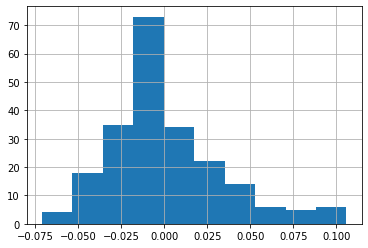

In [251]:
print(returns_bear_2018.describe(), '\n')
print('Total returns: ', returns_bear_2018.sum(), '\n')
print('- Frequency: ', returns_bear_2018.value_counts(bins=10, sort=False))
returns_bear_2018.hist()

### By local minima

In [252]:
returns_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'] > 0, 'returns_long']

count    115.000000
mean      -0.004508
std        0.032579
min       -0.071156
25%       -0.020647
50%       -0.012864
75%        0.012627
max        0.105897
Name: returns_long, dtype: float64 

- Total returns:  -0.518422344419944 

- Frequency:  (-0.0723, -0.0535]      3
(-0.0535, -0.0357]     11
(-0.0357, -0.018]      23
(-0.018, -0.000335]    41
(-0.000335, 0.0174]    15
(0.0174, 0.0351]        8
(0.0351, 0.0528]        8
(0.0528, 0.0705]        2
(0.0705, 0.0882]        2
(0.0882, 0.106]         2
Name: returns_long, dtype: int64


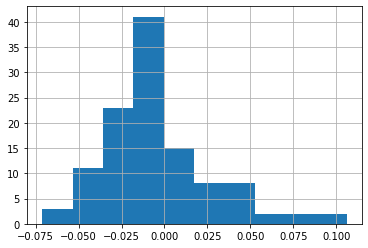

In [253]:
returns_local_min.hist()
print(returns_local_min.describe(), '\n')
print('- Total returns: ', returns_local_min.sum(), '\n')
print('- Frequency: ', returns_local_min.value_counts(bins=10, sort=False))

### By non local minima

In [254]:
returns_non_local_min = trades_bear_2018.loc[trades_bear_2018['indicator'].isnull(), 'returns_long']

count    102.000000
mean       0.006286
std        0.034366
min       -0.054387
25%       -0.015543
50%       -0.006208
75%        0.023459
max        0.103906
Name: returns_long, dtype: float64 

Total returns:  0.6411649718830351 

- Frequency:  (-0.0555, -0.0386]     3
(-0.0386, -0.0227]    14
(-0.0227, -0.0069]    34
(-0.0069, 0.00893]     9
(0.00893, 0.0248]     18
(0.0248, 0.0406]       8
(0.0406, 0.0564]       5
(0.0564, 0.0722]       4
(0.0722, 0.0881]       3
(0.0881, 0.104]        4
Name: returns_long, dtype: int64


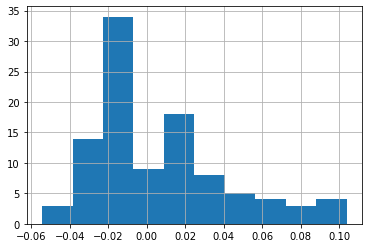

In [255]:
returns_non_local_min.hist()
print(returns_non_local_min.describe(), '\n')
print('Total returns: ', returns_non_local_min.sum(), '\n')
print('- Frequency: ', returns_non_local_min.value_counts(bins=10, sort=False))